In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MapModule
from GraphicalUtils import Point,Edge,Graph,Square
from pprint import pprint
import random
import pickle
import os

## Get full map of Israel
this map will use us to get every sub area in israel and present the points and the flying routes

In [2]:
# ISRAEL_MAP_FILE_NAME = 'israel_map.pkl'
# full_map:MapModule.Map = None
# if(os.path.exists(ISRAEL_MAP_FILE_NAME)):
#     with open(ISRAEL_MAP_FILE_NAME, 'rb') as file:
#         full_map = pickle.load(file)
# else:
#     full_map= MapModule.get_full_israel_map()
#     with open(ISRAEL_MAP_FILE_NAME, 'wb') as file:
#         pickle.dump(full_map, file)

full_map= MapModule.get_full_israel_map()


In [3]:
#map = MapModule.print_map(full_map)

## Get map of Tel Aviv area
from the full Israel map we will crop smaller area of tel aviv

g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


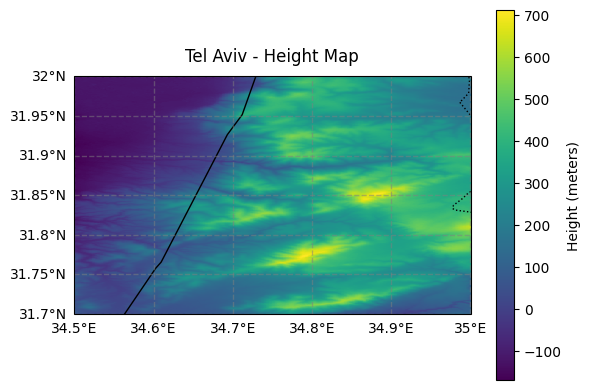

In [4]:
cropped_map = full_map.crop(Point(34.5,31.7),Point(35,32))
map = cropped_map.print()

## Define Pharmecy locations and Costumers location


In the next cell we will define static list of points that represents pharmecies that mark with blue points and static list of static list of yellow points that represent costumers's houses locations

In [5]:
pharmecy_color = 'blue'
costumer_color = 'yellow'

In [6]:
pharmecy_locations = [
    Point(31.9,34.7,color=pharmecy_color),
    Point(31.9,34.85,color=pharmecy_color),
    Point(31.71,34.73,color=pharmecy_color),
    Point(31.812,34.856,color=pharmecy_color),
    Point(31.9,34.9,color=pharmecy_color)
]

In [7]:
costumers_locations = [
    Point(31.84,34.7,color=costumer_color),
    Point(31.9,34.85,color=costumer_color),
    Point(31.8,34.73,color=costumer_color),
    Point(31.754,34.654,color=costumer_color),
    Point(31.845,34.767,color=costumer_color),
    Point(31.745,34.864,color=costumer_color),
    Point(31.912,34.756,color=costumer_color),
    Point(31.8,34.87,color=costumer_color)
]

In [8]:
no_fly_zones = [
    Square(Point(32,34.5),Point(31.95,34.7)),
    Square(Point(31.95,34.5),Point(31.9,34.67)),
    Square(Point(31.9,34.5),Point(31.85,34.65)),
    Square(Point(31.85,34.5),Point(31.8,34.62)),
    Square(Point(31.8,34.5),Point(31.75,34.6)),
    Square(Point(31.75,34.5),Point(31.7,34.58)),
    Square(Point(31.887,34.69),Point(31.878,34.715)),
    #Square(Point(32,34.92),Point(31.7,34.5)),
    Square(Point(31.89,34.78),Point(31.87,34.9)),
    Square(Point(31.82,34.77),Point(31.7,34.82)),
    Square(Point(31.82,34.66),Point(31.8,34.7)),
    Square(Point(31.77,34.68),Point(31.7,34.695))
]

In [9]:
cropped_map.marked_graph.add_points(pharmecy_locations)

In [10]:
cropped_map.marked_graph.add_points(costumers_locations)

In [11]:
cropped_map.no_fly_zones.extend(no_fly_zones)

g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<module 'matplotlib.pyplot' from 'g:\\האחסון שלי\\לימודים\\שנה ג\\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\\פרויקט סעום\\Python_code\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

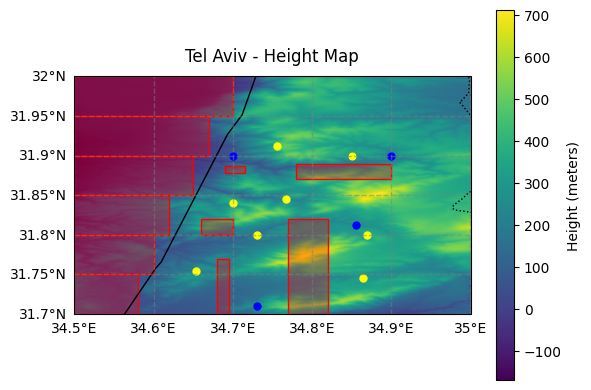

In [12]:
cropped_map.print()

# Sortest path searching

In the next cells we will try to find the shortest path from costumer to the nearst pharmecy

## PRM

In this section Ill we run the first parts of PRM algoritem.
1) Randomaly generate point over the mao
2) delete every point the located in no flight zone
3) connect all the generated point to each other and creat new edges
4) cennect the generated points to each costumer point and create new ages
5) repeat each step foreach pharmacy
6) deleate each edge that pass over no flight zode

### Randomly genarate N new point over the map 

In [13]:
def generate_N_points(N,map:MapModule.Map) ->list[Point]:
    generated_points: list[Point] = []
    max_y, min_x , min_y, max_x = map.bounds

    for i in range(N):
        rand_x = random.uniform(min_x,max_x)
        rand_y = random.uniform(min_y,max_y)
        z_value = map.get_height_at_point(Point(rand_y,rand_x))
        generated_points.append(Point(rand_x,rand_y,color='black',size=1))
    return generated_points


In [14]:
N = 50
generated_points = generate_N_points(N,cropped_map)
cropped_map.marked_graph.add_points(generated_points)

g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<module 'matplotlib.pyplot' from 'g:\\האחסון שלי\\לימודים\\שנה ג\\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\\פרויקט סעום\\Python_code\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

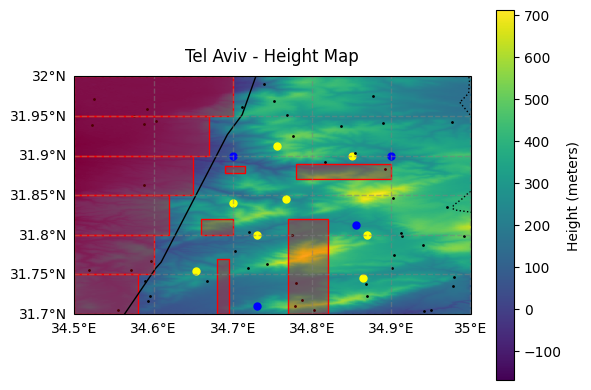

In [15]:
cropped_map.print()

### Delete each point that locatd in no flight zode

In [16]:
def delete_points_from_squers(map:MapModule.Map):
    for zone in map.no_fly_zones:
        for point in map.marked_graph.points:
            if zone.is_inside(point):
                map.marked_graph.points.remove(point)
                map.delete_element(point)

delete_points_from_squers(cropped_map)

g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<module 'matplotlib.pyplot' from 'g:\\האחסון שלי\\לימודים\\שנה ג\\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\\פרויקט סעום\\Python_code\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

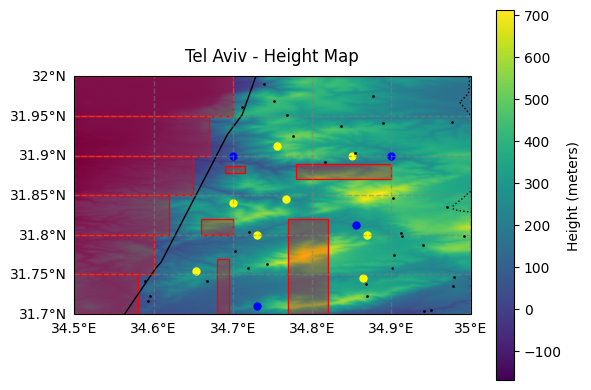

In [17]:
cropped_map.print()

### Conect generated point to each other 

In [18]:
def connect_edges_between_points(points: list[Point],color,thickness = 0.5) -> list[Edge]:
    edges: list[Edge] = []
    for p1 in points:
        for p2 in points:
            if p1 == p2: pass
            edges.append(Edge(p1,p2,color,thickness))
    return edges

def connect_doual_side(points1:list[Point],points2:list[Point],color):
    edges_list :list[Edge] = []
    for point in points1:
        new_list:list[Point] =[]
        new_list.append(point)
        new_list.extend(points2)
        edges_list.extend(connect_edges_between_points(new_list))
    return edges_list




In [19]:
edges_list:list[Edge] = connect_edges_between_points(cropped_map.marked_graph.points,'red',0.05)
cropped_map.marked_graph.add_adges(edges_list)

g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<module 'matplotlib.pyplot' from 'g:\\האחסון שלי\\לימודים\\שנה ג\\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\\פרויקט סעום\\Python_code\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

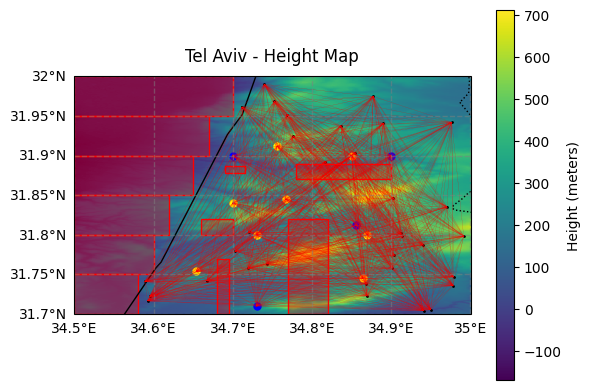

In [20]:
cropped_map.print()